<a href="https://colab.research.google.com/github/Tobi3333A/ACL-Project/blob/main/Face_recognitionProject_ENGR25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
########### build google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
############## tell where is your files/images/'''''
#!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!pip install deepface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.3
    Uninstalling sympy-1.13.3:
      Successfully uninstall

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
25-11-24 13:55:03 - Directory /root/.deepface has been created
25-11-24 13:55:03 - Directory /root/.deepface/weights has been created
25-11-24 13:55:09 - 🔗 facenet512_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5 to /root/.deepface/weights/facenet512_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:00<00:00, 228MB/s]
Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5


25-11-24 13:55:15 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


100%|██████████| 119M/119M [00:00<00:00, 240MB/s] 


Text(0.5, 1.0, 'Face Comparison Results')

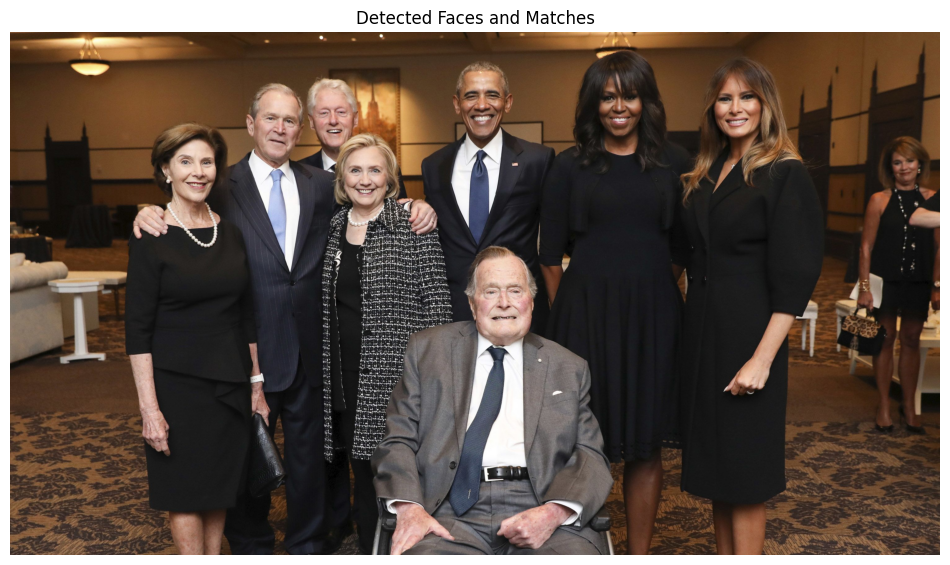

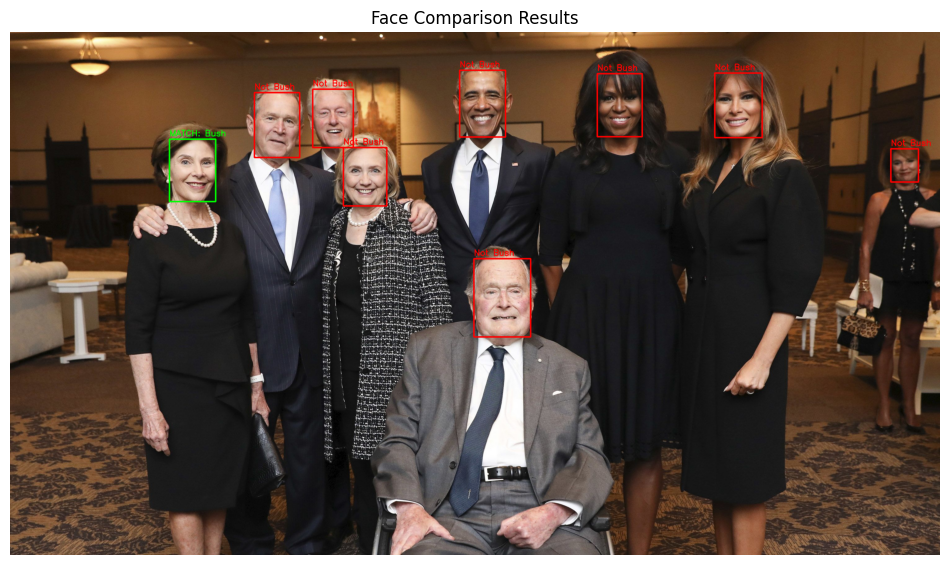

In [ ]:
                                           ###########Task 1
#####  Colab with downloaded images
from google.colab import drive
drive.mount('/content/drive')

import cv2
import matplotlib.pyplot as plt
import numpy as np
from deepface import DeepFace
from retinaface import RetinaFace
from PIL import Image

# ---------------------------------------------------------
# Paths to your images
# ---------------------------------------------------------
folder = "/content/drive/MyDrive/"
known_path = f"{folder}/ima1.jpg"
test_path  = f"{folder}/five presdient.jpg"

# Load images
known_img = cv2.imread(known_path)
known_img_rgb = cv2.cvtColor(known_img, cv2.COLOR_BGR2RGB)

test_img = cv2.imread(test_path)
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# ---------------------------------------------------------
# Extract known face embedding once
# ---------------------------------------------------------
known_embedding = DeepFace.represent(
    img_path=known_path,
    model_name="Facenet512",
    enforce_detection=False)[0]["embedding"]

# ---------------------------------------------------------
# Detect all faces in test image using RetinaFace
# ---------------------------------------------------------
faces = RetinaFace.detect_faces(test_path)
output_img = test_img_rgb.copy()

plt.figure(figsize=(12,12))
plt.imshow(test_img_rgb)
plt.title("Detected Faces and Matches")
plt.axis("off")

# ---------------------------------------------------------
# Loop through detected faces
# ---------------------------------------------------------
for key in faces.keys():
    face = faces[key]
    x1, y1, x2, y2 = face["facial_area"]

    # Crop face
    face_crop = test_img_rgb[y1:y2, x1:x2]

    # Compute embedding
    try:
        result = DeepFace.verify(
            img1_path=known_path,
            img2_path=face_crop,
            model_name="Facenet512",
            enforce_detection=False
        )

        match = result["verified"]
    except:
        match = False

    # -----------------------------------------------------
    # Draw bounding box and label
    # -----------------------------------------------------
    if match:
        color = (0,255,0)  # green
        label = "MATCH: Bush"
    else:
        color = (255,0,0)  # red
        label = "Not Bush"

    cv2.rectangle(output_img, (x1,y1), (x2,y2), color, 3)
    cv2.putText(
        output_img, label, (x1, y1-10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2
    )

# Show final output
plt.figure(figsize=(12,12))
plt.imshow(output_img)
plt.axis("off")
plt.title("Face Comparison Results")


   ###########################Details Explanasion line by line program for downloaded images for face regonition   
Imports
from deepface import DeepFace
import cv2
import numpy as np

✔ What this means:

DeepFace → used for face detection, embedding, and recognition.

cv2 → OpenCV library used to read images, show webcam frames, draw boxes.

numpy → used for mathematical operations (cosine similarity).

---------------------------
Cosine distance function
---------------------------
def cosine_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return 1 - (np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))

✔ Explanation:

Converts lists a and b into NumPy arrays.

Computes dot product between the two vectors.

Divides by the product of their magnitudes (norms).

1 - similarity converts cosine similarity → distance.

👉 If distance < 0.40, the faces are considered similar / same person.

---------------------------
Load the known face
---------------------------
known_path = "images1.JPG"   # <-- change if needed

✔ What this does:

This is the filename of the known face (e.g., George W. Bush).

known_img = cv2.imread(known_path)

✔ Explanation:

Loads the image from disk.

OpenCV loads images as BGR format.

if known_img is None:
    raise ValueError("❌ Error: Could not load known image. Check filename.")

✔ Explanation:

If the image doesn’t exist or path is incorrect, OpenCV returns None.

This line stops the program and prints a helpful error.

print("✔ Known face loaded!")

✔ Explanation:

Confirms the known face image was successfully loaded.

Compute embedding for the known person
known_embedding = DeepFace.represent(
    known_img, model_name="ArcFace", enforce_detection=False
)[0]["embedding"]

✔ Explanation:

DeepFace.represent creates a numerical face embedding of the known image.

model_name="ArcFace" → extremely accurate embedding model.

enforce_detection=False means don’t crash if detection is imperfect.

[0] → first detected face.

["embedding"] → extracts the 512-dim embedding vector.

print("✔ Known face encoded!")

✔ Explanation:

Confirms embedding extraction succeeded.

---------------------------
Start webcam
---------------------------
cap = cv2.VideoCapture(0)

✔ Explanation:

Opens webcam device 0

Use 1 or 2 if you have external cameras.

if not cap.isOpened():
    raise IOError("❌ Cannot open webcam")

✔ Explanation:

Checks whether webcam is available.

If not, program stops with an error.

print("📷 Webcam started. Press Q to quit.")

✔ Explanation:

Informational message for user.

---------------------------
Real-time loop
---------------------------
while True:

✔ Explanation:

Infinite loop until user presses 'q'.

    ret, frame = cap.read()

✔ Explanation:

Reads one frame from the webcam.

ret → True if successful.

frame → the actual image.

    if not ret:
        print("⚠ Failed to grab frame")
        break

✔ Explanation:

If camera fails, stop the loop.

Face detection on the live frame
    faces = DeepFace.extract_faces(
        frame, detector_backend="retinaface", enforce_detection=False
    )

✔ Explanation:

extract_faces() returns:

cropped faces

facial areas (x, y, w, h)

detector_backend="retinaface":

best accuracy

detects multiple faces

frame is passed directly as a numpy array

enforce_detection=False prevents errors

    output = frame.copy()

✔ Explanation:

Copy original frame so we draw on the copy (cleaner).

Loop through all detected faces
    for face in faces:

✔ Explanation:

For each detected face (could be 1 or many).

Extract bounding box
        area = face["facial_area"]
        x, y, w, h = area["x"], area["y"], area["w"], area["h"]

✔ Explanation:

area is a dictionary containing bounding box info:

x, y → top-left corner

w, h → width + height

Extract the cropped face
        face_img = face["face"]

✔ Explanation:

This is the aligned, cropped, straightened face image output by DeepFace.

Embed the detected face
        face_embedding = DeepFace.represent(
            face_img, model_name="ArcFace", enforce_detection=False
        )[0]["embedding"]

✔ Explanation:

Converts the webcam face into an embedding vector.

Uses ArcFace again for consistency.

Compare embeddings
        distance = cosine_distance(known_embedding, face_embedding)
        match = distance < 0.40  # threshold

✔ Explanation:

Computes cosine distance between:

known person embedding

live webcam face embedding

If distance < 0.40, it is considered a match.

Choose bounding box color
        color = (0,255,0) if match else (0,0,255)

✔ Explanation:

Green (0,255,0) → MATCH

Red (0,0,255) → NOT MATCH

Text label
        label = f"MATCH ({distance:.2f})" if match else f"NOT MATCH ({distance:.2f})"

✔ Explanation:

Creates label text including the distance score:

"MATCH (0.23)"

"NOT MATCH (0.68)"

Draw the bounding box
        cv2.rectangle(output, (x, y), (x + w, y + h), color, 3)

✔ Explanation:

Draws a rectangle around detected face.

Draw label text
        cv2.putText(output, label, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

✔ Explanation:

Puts text above the bounding box.

Font size = 0.8

Thickness = 2

Show the video stream
    cv2.imshow("Real-Time Face Recognition", output)

✔ Explanation:

Displays the video with boxes and labels.

Quit on Q
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

✔ Explanation:

cv2.waitKey(1) checks pressed key.

If 'q' → break the loop → exit program.

Cleanup
cap.release()
cv2.destroyAllWindows()

✔ Explanation:

Releases webcam device.

Closes OpenCV windows.

## Video

In [ ]:
                                                                     ###########Task 2
#####  Local machine with real-time video using Webcam
! pip install deepface
! pip install opencv-python

Known face embedding generated!
Processing video (422 frames)...
Processed 30/422 frames...
Processed 60/422 frames...
Processed 90/422 frames...
Processed 120/422 frames...
Processed 150/422 frames...
Processed 180/422 frames...
Processed 210/422 frames...
Processed 240/422 frames...
Processed 270/422 frames...
Processed 300/422 frames...
Processed 330/422 frames...
Processed 360/422 frames...
Processed 390/422 frames...
Video processing completed!
Saved output at: /content/drive/MyDrive/Facial_Rec/video_output1.mp4


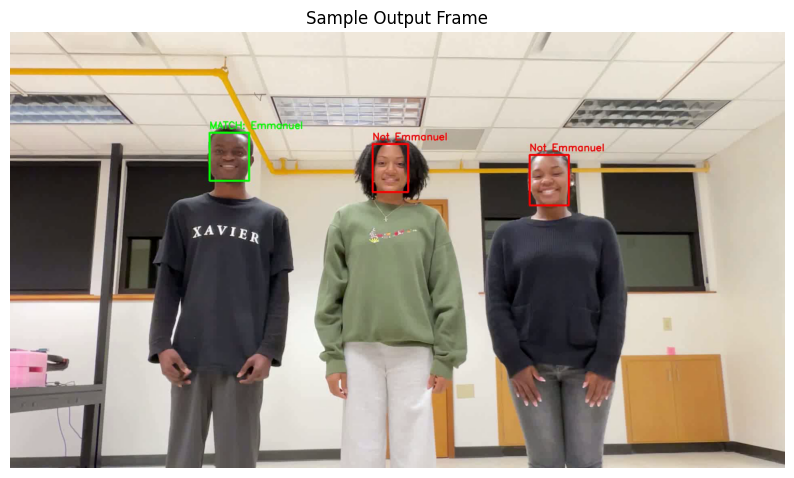

In [ ]:

# ---------------------------------------------------------
# Paths
# ---------------------------------------------------------
folder = "/content/drive/MyDrive/Facial_Rec"
known_path = f"{folder}/Emmanuel.jpeg"
video_path = f"{folder}/vid.mov"      # <<< YOUR VIDEO HERE
output_path = f"{folder}/video_output1.mp4"

# ---------------------------------------------------------
# Load known image and compute its embedding once
# ---------------------------------------------------------
known_embedding = DeepFace.represent(
    img_path=known_path,
    model_name="Facenet512",
    enforce_detection=False
)[0]["embedding"]

print("Known face embedding generated!")

# ---------------------------------------------------------
# Video input/output setup
# ---------------------------------------------------------
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: cannot open video.")

fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Processing video ({frame_count} frames)...")

# ---------------------------------------------------------
# Process each frame
# ---------------------------------------------------------
frame_id = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    output_frame = frame.copy()

    # -----------------------------------------
    # Detect faces in the frame
    # -----------------------------------------
    try:
        faces = RetinaFace.detect_faces(frame_rgb)
    except:
        faces = {}

    if isinstance(faces, dict):

        # Loop through all detected faces
        for key in faces.keys():
            face = faces[key]
            x1, y1, x2, y2 = face["facial_area"]

            # Crop face region
            face_crop = frame_rgb[y1:y2, x1:x2]

            # -----------------------------------------
            # Compare cropped face with known object(person/car)
            # -----------------------------------------
            try:
                result = DeepFace.verify(
                    img1_path=known_path,
                    img2_path=face_crop,
                    model_name="Facenet512",
                    enforce_detection=False
                )
                match = result["verified"]
            except:
                match = False

            # -----------------------------------------
            # Draw bounding box & label for the detected object(person/car)
            # -----------------------------------------
            if match:
                color = (0,255,0)
                label = "MATCH: Emmanuel"
            else:
                color = (0,0,255)
                label = "Not Emmanuel"

            cv2.rectangle(output_frame, (x1,y1), (x2,y2), color, 3)
            cv2.putText(output_frame, label, (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    # -----------------------------------------
    # Write frame to output video
    # -----------------------------------------
    out.write(output_frame)

    frame_id += 1
    if frame_id % 30 == 0:
        print(f"Processed {frame_id}/{frame_count} frames...")

cap.release()
out.release()

print("Video processing completed!")
print("Saved output at:", output_path)

# ---------------------------------------------------------
# OPTIONAL: Display 1 frame as example
# ---------------------------------------------------------
cap_test = cv2.VideoCapture(output_path)
ret, sample_frame = cap_test.read()
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(sample_frame, cv2.COLOR_BGR2RGB))
plt.title("Sample Output Frame")
plt.axis("off")
cap_test.release()


                  ###########################Details Explanasion line by line prohgram for Live face reognition  
from deepface import DeepFace
2  import cv2
3  import numpy as np

4  # ---------------------------
5  # Cosine distance function
6  # ---------------------------
7  def cosine_distance(a, b):
8      a = np.array(a)
9      b = np.array(b)
10     return 1 - (np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))

11 # ---------------------------
12 # Load the known face
13 # ---------------------------
14 known_path = "images1.JPG"   # <-- change if needed
15
16 known_img = cv2.imread(known_path)
17 if known_img is None:
18     raise ValueError("❌ Error: Could not load known image. Check filename.")

19 print("✔ Known face loaded!")

20 # Compute embedding for your known person
21 known_embedding = DeepFace.represent(
22     known_img, model_name="ArcFace", enforce_detection=False
23 )[0]["embedding"]

24 print("✔ Known face encoded!")

25 # ---------------------------
26 # Start webcam
27 # ---------------------------
28 cap = cv2.VideoCapture(0)
29 if not cap.isOpened():
30     raise IOError("❌ Cannot open webcam")

31 print("📷 Webcam started. Press Q to quit.")

32 # ---------------------------
33 # Real-time loop
34 # ---------------------------
35 while True:
36     ret, frame = cap.read()
37     if not ret:
38         print("⚠ Failed to grab frame")
39         break

40     # DeepFace face detection
41     faces = DeepFace.extract_faces(
42         frame, detector_backend="retinaface", enforce_detection=False
43     )

44     output = frame.copy()

45     for face in faces:
46         area = face["facial_area"]
47         x, y, w, h = area["x"], area["y"], area["w"], area["h"]

48         face_img = face["face"]

49         # Embed face
50         face_embedding = DeepFace.represent(
51             face_img, model_name="ArcFace", enforce_detection=False
52         )[0]["embedding"]

53         # Compare
54         distance = cosine_distance(known_embedding, face_embedding)
55         match = distance < 0.40  # threshold

56         color = (0,255,0) if match else (0,0,255)
57         label = f"MATCH ({distance:.2f})" if match else f"NOT MATCH ({distance:.2f})"

58         # Draw box & label
59         cv2.rectangle(output, (x, y), (x + w, y + h), color, 3)
60         cv2.putText(output, label, (x, y - 10),
61                     cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

62     # Show stream
63     cv2.imshow("Real-Time Face Recognition", output)

64     # Press 'q' to quit
65     if cv2.waitKey(1) & 0xFF == ord("q"):
66         break

67 cap.release()
68 cv2.destroyAllWindows()



#####################
Line-by-line explanation

Lines 1–3 — imports

from deepface import DeepFace

Imports the DeepFace module. This provides face detection and embedding (representation) utilities for several modern face-recognition models (ArcFace, FaceNet, etc.).

import cv2

Imports OpenCV, used for camera capture and drawing rectangles/text on frames.

import numpy as np

Imports NumPy for numerical operations (vectors, dot products, norms).

Lines 4–10 — cosine distance helper
4–6. Comment block separating helper function (visual only).
7. def cosine_distance(a, b):

Defines a helper function to compute cosine distance between two vectors (embeddings).

a = np.array(a)

Ensures a is a NumPy array (needed for dot and norm operations).

b = np.array(b)

Ensures b is a NumPy array.

return 1 - (np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))

Computes cosine similarity dot(a,b)/(||a||*||b||) then returns 1 - similarity so smaller result means more similar (0 = identical, 1 = opposite).

Lines 11–19 — load the reference (known) face
11–13. Comment block for clarity.
14. known_path = "images1.JPG" # <-- change if needed
- Path/filename of the image of the known person (George W. Bush in your case). Change to the correct filename or absolute path if needed.
16. known_img = cv2.imread(known_path)
- Reads the image file into a BGR NumPy array. Returns None if the file is not found or cannot be read.
17–18. if known_img is None: raise ValueError(...)
- Defensive check: stop with a clear error if the known image could not be loaded.
19. print("✔ Known face loaded!")
- Informational message to the console.

Lines 20–24 — compute embedding for known face
20. Comment.
21–23. known_embedding = DeepFace.represent(known_img, model_name="ArcFace", enforce_detection=False)[0]["embedding"]
- DeepFace.represent(...) computes a face embedding (vector) for the given image.
- model_name="ArcFace" selects ArcFace model (strong, high-accuracy).
- enforce_detection=False tells DeepFace not to try to run a face detector again (useful when you already know image contains a face or you want to avoid failures).
- represent() returns a list/dict; [0]["embedding"] extracts the numeric embedding vector.
24. print("✔ Known face encoded!")
- Confirms encoding step completed.

Lines 25–31 — start webcam
25–27. Comment.
28. cap = cv2.VideoCapture(0)
- Opens the default webcam (device index 0). On multi-camera systems you might choose another index (1,2,...).
29–30. if not cap.isOpened(): raise IOError("...")
- Defensive: if the webcam cannot be opened (no camera, permission denied), raise error and stop.
31. print("📷 Webcam started. Press Q to quit.")
- Informational console message.

Lines 32–39 — real-time loop start & frame capture
32–34. Comment.
35. while True:
- Infinite loop to continuously read frames from webcam.
36. ret, frame = cap.read()
- Reads a frame: ret is True if successful; frame is the image (BGR array).
37–39. If read failed (not ret), print a warning and break out of loop.

Lines 40–44 — detect faces in the frame
40. Comment.
41–43. faces = DeepFace.extract_faces(frame, detector_backend="retinaface", enforce_detection=False)
- Detects faces in frame using the specified detector backend (retinaface is robust/fast).
- Returns a list of face objects; each face contains facial_area (x,y,w,h) and face (cropped face RGB image).
- enforce_detection=False avoids raising an error if no faces are found.
44. output = frame.copy()
- Make a copy of the frame to draw boxes/labels on without modifying original.

Lines 45–52 — iterate detected faces and embed each
45. for face in faces:
- Loop over each detected face.
46. area = face["facial_area"]
- area is a dict like {"x":..., "y":..., "w":..., "h":..., ...}.
47. x, y, w, h = area["x"], area["y"], area["w"], area["h"]
- Extract integer coordinates and dimensions.
48. face_img = face["face"]
- face_img is the cropped face image (RGB/BGR depending on DeepFace version — DeepFace functions handle either).
50–52. face_embedding = DeepFace.represent(face_img, model_name="ArcFace", enforce_detection=False)[0]["embedding"]
- Produce the ArcFace embedding for this cropped face. enforce_detection=False prevents DeepFace from trying to detect faces again inside the already-cropped face.

Lines 53–57 — compare embeddings and threshold
53. Comment.
54. distance = cosine_distance(known_embedding, face_embedding)
- Compute cosine distance between the known-person embedding and the detected face embedding. Lower is more similar.
55. match = distance < 0.40 # threshold
- Decide match vs not-match using a threshold (0.40 recommended for ArcFace; you can tune). If distance < 0.40, label as match.
56. color = (0,255,0) if match else (0,0,255)
- Choose box color: green for match, red for not match. (OpenCV uses BGR color order, so (0,255,0) = green.)
57. label = f"MATCH ({distance:.2f})" if match else f"NOT MATCH ({distance:.2f})"
- Prepare the label text including the numeric distance for debugging/inspection.

Lines 58–61 — draw box & label
58. Comment.
59. cv2.rectangle(output, (x, y), (x + w, y + h), color, 3)
- Draw the rectangle around the face on the output frame.
60–61. cv2.putText(output, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
- Draw the label above the bounding box using a readable font and thickness.

Lines 62–66 — display frame & check quit key
62. Comment.
63. cv2.imshow("Real-Time Face Recognition", output)
- Show the annotated video frame in a window titled "Real-Time Face Recognition".
64–66. if cv2.waitKey(1) & 0xFF == ord("q"): break
- cv2.waitKey(1) waits 1 ms for a keypress and also allows the window to refresh. If the user presses 'q', exit the loop.

Lines 67–68 — cleanup
67. cap.release()
- Release the webcam device (free it so other programs can use it).
68. cv2.destroyAllWindows()
- Close any OpenCV windows created.

Quick notes, tips & troubleshooting

Model & speed: ArcFace is accurate but heavier. If you need speed, you can try model_name="Facenet", but ArcFace is more reliable for tough matches.

Detector backend: retinaface is robust. Alternatives: "mtcnn", "opencv", "ssd". RetinaFace tends to be best for in-the-wild photos.

Threshold tuning: 0.40 is a good starting point for ArcFace. If you see false negatives, raise to 0.45–0.50; for false positives, lower to 0.30–0.35.

enforce_detection=False: used here to avoid crashes on small or tricky crops; it avoids raising exceptions but you should still verify outputs.

Color space: DeepFace functions accept NumPy images; if you run into weird colors, convert between BGR/RGB as needed (cv2.cvtColor).

Performance: This script runs on CPU. For faster performance on many faces, use a GPU and ensure DeepFace uses GPU-enabled backend (TensorFlow/PyTorch GPU).

Multiple known people: To recognize a database of people, compute and store embeddings for each known person and compare detected faces to the whole database (choose min distance).

Privacy & ethics: Only run face recognition on images/people for whom you have permission; be mindful of legal and ethical implications.


Line-by-Line Explanation of the Webcam Face Recognition Code
1. Imports
from deepface import DeepFace
import cv2
import numpy as np
import time

✔ Explanation:

DeepFace – used for face detection + face embedding.

cv2 (OpenCV) – used to read webcam frames and draw boxes.

numpy – used for math with embeddings.

time – used to manage FPS (frames per second).

2. Cosine Distance Function
def cosine_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return 1 - (np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))

✔ Explanation:

Converts lists a and b into NumPy arrays.

Computes the cosine similarity between embeddings.

Converts similarity → distance.

👉 If distance < 0.40 → they are likely the same person.

3. Load known face (George W. Bush)
known_path = "/content/drive/MyDrive/UAV_Wavelet_Yolo12_Tracking_UAV/images1.JPG"
known_img = cv2.imread(known_path)

✔ Explanation:

known_path – full path to the known Bush image.

cv2.imread() loads it as a BGR image.

4. Compute embedding of known face
known_embedding = DeepFace.represent(
    known_img, model_name="ArcFace", enforce_detection=False
)[0]["embedding"]

✔ Explanation:

DeepFace.represent() extracts a 128-D or 512-D face embedding.

We use model "ArcFace" → very accurate.

enforce_detection=False avoids crashing if detection is imperfect.

[0]["embedding"] takes the embedding of first detected face.

5. Start the webcam
cam = cv2.VideoCapture(0)

✔ Explanation:

Opens webcam device 0.

If you have multiple cameras, change to 1 or 2.

6. Main loop
while True:
    ret, frame = cam.read()

✔ Explanation:

ret = True if frame was captured.

frame = actual image from webcam.

7. Detect faces in webcam frame
faces = DeepFace.extract_faces(
    img_path=frame,
    detector_backend="retinaface",
    enforce_detection=False
)

✔ Explanation:

extract_faces() returns:

cropped face images

face bounding box info

retinaface is the best, strongest detector.

Works even with:

angled faces

partial occlusion

multiple people

8. Loop through detected faces
for face in faces:

✔ Explanation:

We process each detected face separately.

9. Get bounding box
area = face["facial_area"]
x, y, w, h = area["x"], area["y"], area["w"], area["h"]

✔ Explanation:

RetinaFace returns a bounding box dictionary.

Extract x, y, width, height.

10. Get cropped face image
face_img = face["face"]

✔ Explanation:

This is the aligned + cropped face.

11. Compute embedding for webcam face
face_embedding = DeepFace.represent(
    face_img, model_name="ArcFace", enforce_detection=False
)[0]["embedding"]

✔ Explanation:

Converts the detected webcam face into an embedding.

12. Compare known Bush → live face
distance = cosine_distance(known_embedding, face_embedding)
match = distance < 0.40

✔ Explanation:

Calculates similarity.

If distance < 0.40 → considered a match.

0.40 threshold is good for ArcFace.

13. Draw bounding box
color = (0, 255, 0) if match else (0, 0, 255)
cv2.rectangle(frame, (x, y), (x + w, y + h), color, 3)

✔ Explanation:

Green box = match

Red box = not a match

14. Draw label text
label = f"Bush ({distance:.2f})" if match else f"Not Bush ({distance:.2f})"
cv2.putText(frame, label, (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

✔ Explanation:

Shows text above the box:

Bush (0.21)

Not Bush (0.69)

15. Show webcam output
cv2.imshow("Bush Detector", frame)

✔ Explanation:

Opens a real-time video window.

16. Break loop with “q” key
if cv2.waitKey(1) & 0xFF == ord('q'):
    break

✔ Explanation:

Press q to quit cleanly.

17. Cleanup
cam.release()
cv2.destroyAllWindows()

✔ Explanation:

Releases camera.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/UAV_Wavelet_Yolo12_Tracking_UAV/ima1.jpg'

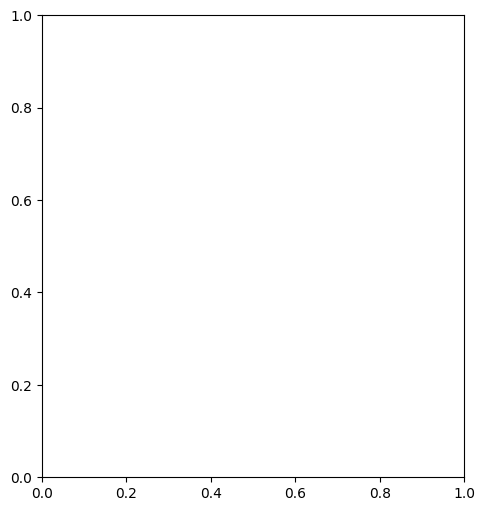

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
from deepface import DeepFace
import matplotlib.pyplot as plt
from PIL import Image

folder = "/content/drive/MyDrive/UAV_Wavelet_Yolo12_Tracking_UAV"

known_path = f"{folder}/ima1.jpg"
test_path  = f"{folder}/five presdient.jpg"

# Show images
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(Image.open(known_path))
plt.title("Known Face: George Bush")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(Image.open(test_path))
plt.title("Test Image")
plt.axis('off')
plt.show()

# ---- Face verification using DeepFace ----
result = DeepFace.verify(
    img1_path = known_path,
    img2_path = test_path,
    model_name = "Facenet512"  # most accurate
)

print(result)


In [ ]:
###########final
from google.colab import drive
drive.mount('/content/drive')

import cv2
import matplotlib.pyplot as plt
import numpy as np
from deepface import DeepFace
from retinaface import RetinaFace
from PIL import Image

# ---------------------------------------------------------
# Paths to your images
# ---------------------------------------------------------
folder = "/content/drive/MyDrive/UAV_Wavelet_Yolo12_Tracking_UAV"
known_path = f"{folder}/ima1.jpg"
test_path  = f"{folder}/five presdient.jpg"

# Load images
known_img = cv2.imread(known_path)
known_img_rgb = cv2.cvtColor(known_img, cv2.COLOR_BGR2RGB)

test_img = cv2.imread(test_path)
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# ---------------------------------------------------------
# Extract known face embedding once
# ---------------------------------------------------------
known_embedding = DeepFace.represent(
    img_path=known_path,
    model_name="Facenet512",
    enforce_detection=False
)[0]["embedding"]

# ---------------------------------------------------------
# Detect all faces in test image using RetinaFace
# ---------------------------------------------------------
faces = RetinaFace.detect_faces(test_path)
output_img = test_img_rgb.copy()

plt.figure(figsize=(12,12))
plt.imshow(test_img_rgb)
plt.title("Detected Faces and Matches")
plt.axis("off")

# ---------------------------------------------------------
# Loop through detected faces
# ---------------------------------------------------------
for key in faces.keys():
    face = faces[key]
    x1, y1, x2, y2 = face["facial_area"]

    # Crop face
    face_crop = test_img_rgb[y1:y2, x1:x2]

    # Compute embedding
    try:
        result = DeepFace.verify(
            img1_path=known_path,
            img2_path=face_crop,
            model_name="Facenet512",
            enforce_detection=False
        )

        match = result["verified"]
    except:
        match = False

    # -----------------------------------------------------
    # Draw bounding box and label
    # -----------------------------------------------------
    if match:
        color = (0,255,0)  # green
        label = "MATCH: Bush"
    else:
        color = (255,0,0)  # red
        label = "Not Bush"

    cv2.rectangle(output_img, (x1,y1), (x2,y2), color, 3)
    cv2.putText(
        output_img, label, (x1, y1-10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2
    )

# Show final output
plt.figure(figsize=(12,12))
plt.imshow(output_img)
plt.axis("off")
plt.title("Face Comparison Results")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import matplotlib.pyplot as plt
import numpy as np
from deepface import DeepFace
from retinaface import RetinaFace
from PIL import Image

# ---------------------------------------------------------
# Paths to your images
# ---------------------------------------------------------
folder = "/content/drive/MyDrive/UAV_Wavelet_Yolo12_Tracking_UAV"
known_path = f"{folder}/George-Bush.JPG"
test_path  = f"{folder}/five presdient.jpg"

# Load images
known_img = cv2.imread(known_path)
known_img_rgb = cv2.cvtColor(known_img, cv2.COLOR_BGR2RGB)

test_img = cv2.imread(test_path)
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# ---------------------------------------------------------
# Extract known face embedding once
# ---------------------------------------------------------
known_embedding = DeepFace.represent(
    img_path=known_path,
    model_name="Facenet512",
    enforce_detection=False
)[0]["embedding"]

# ---------------------------------------------------------
# Detect all faces in test image using RetinaFace
# ---------------------------------------------------------
faces = RetinaFace.detect_faces(test_path)
output_img = test_img_rgb.copy()

plt.figure(figsize=(12,12))
plt.imshow(test_img_rgb)
plt.title("Detected Faces and Matches")
plt.axis("off")

# ---------------------------------------------------------
# Loop through detected faces
# ---------------------------------------------------------
for key in faces.keys():
    face = faces[key]
    x1, y1, x2, y2 = face["facial_area"]

    # Crop face
    face_crop = test_img_rgb[y1:y2, x1:x2]

    # Compute embedding
    try:
        result = DeepFace.verify(
            img1_path=known_path,
            img2_path=face_crop,
            model_name="Facenet512",
            enforce_detection=False
        )

        match = result["verified"]
    except:
        match = False

    # -----------------------------------------------------
    # Draw bounding box and label
    # -----------------------------------------------------
    if match:
        color = (0,255,0)  # green
        label = "MATCH: Bush"
    else:
        color = (255,0,0)  # red
        label = "Not Bush"

    cv2.rectangle(output_img, (x1,y1), (x2,y2), color, 3)
    cv2.putText(
        output_img, label, (x1, y1-10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2
    )

# Show final output
plt.figure(figsize=(12,12))
plt.imshow(output_img)
plt.axis("off")
plt.title("Face Comparison Results")

In [ ]:
# --- 1. Mount Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- 2. Set Path ---
folder = "/content/drive/MyDrive/UAV_Wavelet_Yolo12_Tracking_UAV"

known_path = f"{folder}/George-Bush.JPG"
test_path  = f"{folder}/five presdient.jpg"

print("Known face path:", known_path)
print("Test image path:", test_path)

# --- 3. Import packages ---
import cv2
import face_recognition
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# --- 4. Load known face ---
known_image = face_recognition.load_image_file(known_path)

known_faces = face_recognition.face_encodings(
    known_image, num_jitters=10, model='large'
)[0]

print("Known face encoding loaded.")

# --- 5. Load test image ---
frame = face_recognition.load_image_file(test_path)

# --- 6. Detect faces in test image ---
face_locations = face_recognition.face_locations(frame)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(frame)

for face_location in face_locations:
    top, right, bottom, left = face_location

    # Draw bounding box
    rect = plt.Rectangle((left, top), right-left, bottom-top,
                         fill=False, color='blue', linewidth=2)
    ax.add_patch(rect)

    try:
        # Encode the detected face
        live_encoding = face_recognition.face_encodings(
            frame, known_face_locations=[face_location],
            num_jitters=10, model='large'
        )[0]

        # Compare with known encoding
        result = face_recognition.compare_faces(
            [known_faces], live_encoding
        )[0]

        if result:
            label = "MATCH: George Bush"
            color = "green"
        else:
            label = "NOT George Bush"
            color = "red"

        ax.text(left, top-10, label, color=color,
                fontsize=14, weight="bold")

    except Exception as e:
        ax.text(left, top-10, "Encoding failed",
                color="orange", fontsize=12)

plt.axis('off')
plt.show()

In [ ]:
import os

folder = "/content/drive/MyDrive/UAV_Wavelet_Yolo12_Tracking_UAV/"
print(os.listdir(folder))

In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import numpy as np

def cosine_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return 1 - (np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))

known_path = "/content/drive/MyDrive/UAV_Wavelet_Yolo12_Tracking_UAV/images1.JPG"
test_path  = "/content/drive/MyDrive/UAV_Wavelet_Yolo12_Tracking_UAV/five presdient.jpg"

known_img = cv2.imread(known_path)
test_img  = cv2.imread(test_path)

print("known loaded:", known_img is not None)
print("test loaded:", test_img is not None)

if known_img is None:
    raise ValueError("❌ Known image path incorrect")

if test_img is None:
    raise ValueError("❌ Test image path incorrect")

# Encode Bush
known_embedding = DeepFace.represent(
    known_img, model_name="ArcFace", enforce_detection=False
)[0]["embedding"]

# Detect faces
faces = DeepFace.extract_faces(
    test_img, detector_backend="retinaface", enforce_detection=False
)

output = test_img.copy()

for face in faces:
    area = face["facial_area"]
    x, y, w, h = area["x"], area["y"], area["w"], area["h"]

    face_img = face["face"]

    face_embedding = DeepFace.represent(
        face_img, model_name="ArcFace", enforce_detection=False
    )[0]["embedding"]

    distance = cosine_distance(known_embedding, face_embedding)
    match = distance < 0.40

    color = (0,255,0) if match else (0,0,255)
    cv2.rectangle(output, (x, y), (x + w, y + h), color, 3)

    label = f"Bush ({distance:.2f})" if match else f"Not Bush ({distance:.2f})"
    cv2.putText(output, label, (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(output_rgb)
plt.axis("off")
plt.show()


In [ ]:
######final
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import numpy as np

# --- Utility: cosine distance ---
def cosine_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return 1 - (np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))

# --- Load images ---
known_path = "/content/drive/MyDrive/UAV_Wavelet_Yolo12_Tracking_UAV/images1.JPG"
test_path  = "/content/drive/MyDrive/UAV_Wavelet_Yolo12_Tracking_UAV/five presdient.jpg"

known_img = cv2.imread(known_path)
test_img  = cv2.imread(test_path)

# --- Encode George W. Bush ---
known_embedding = DeepFace.represent(
    known_img, model_name="ArcFace", enforce_detection=False
)[0]["embedding"]

# --- Detect all faces in test image ---
faces = DeepFace.extract_faces(
    test_img, detector_backend="retinaface", enforce_detection=False
)

output = test_img.copy()

for face in faces:
    area = face["facial_area"]

    x = area["x"]
    y = area["y"]
    w = area["w"]
    h = area["h"]

    face_img = face["face"]

    # Compute embedding for detected face
    face_embedding = DeepFace.represent(
        face_img, model_name="ArcFace", enforce_detection=False
    )[0]["embedding"]

    # --- Compare similarity using custom cosine distance ---
    distance = cosine_distance(known_embedding, face_embedding)
    match = distance < 0.40   # threshold

    # --- Draw bounding box ---
    color = (0,255,0) if match else (0,0,255)
    cv2.rectangle(output, (x, y), (x + w, y + h), color, 3)

    # Label
    label = f"Bush ({distance:.2f})" if match else f"Not Bush ({distance:.2f})"
    cv2.putText(output, label, (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

# --- Display result ---
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(output_rgb)
plt.axis("off")
plt.show()